In [92]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import math
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression 
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import f1_score

In [2]:
data = pd.read_csv('hero-network.csv')
data.head()

,hero1,hero2
0,"LITTLE, ABNER",PRINCESS ZANDA
1,"LITTLE, ABNER",BLACK PANTHER/T'CHAL
2,BLACK PANTHER/T'CHAL,PRINCESS ZANDA
3,"LITTLE, ABNER",PRINCESS ZANDA
4,"LITTLE, ABNER",BLACK PANTHER/T'CHAL


In [3]:
#data.to_csv('marvel_noheader.csv', index = False, header = False)
data

,hero1,hero2
0,"LITTLE, ABNER",PRINCESS ZANDA
1,"LITTLE, ABNER",BLACK PANTHER/T'CHAL
2,BLACK PANTHER/T'CHAL,PRINCESS ZANDA
3,"LITTLE, ABNER",PRINCESS ZANDA
4,"LITTLE, ABNER",BLACK PANTHER/T'CHAL
...,...,...
574462,COLOSSUS II/PETER RA,CALLISTO
574463,CALLISTO,ROGUE /
574464,CALLISTO,CALIBAN/
574465,CALIBAN/,ROGUE /


In [4]:
g = nx.from_pandas_edgelist(data, source = 'hero1', target = 'hero2',
                    create_using = nx.Graph())
print(nx.info(g))

Name: 
Type: Graph
Number of nodes: 6426
Number of edges: 167219
Average degree:  52.0445


In [5]:
sample = pd.read_csv('hero-network.csv', nrows = 50)
g_sample = nx.from_pandas_edgelist(sample, source = 'hero1', target = 'hero2',
                                  create_using = nx.Graph())
print(nx.info(g_sample))

Name: 
Type: Graph
Number of nodes: 14
Number of edges: 27
Average degree:   3.8571


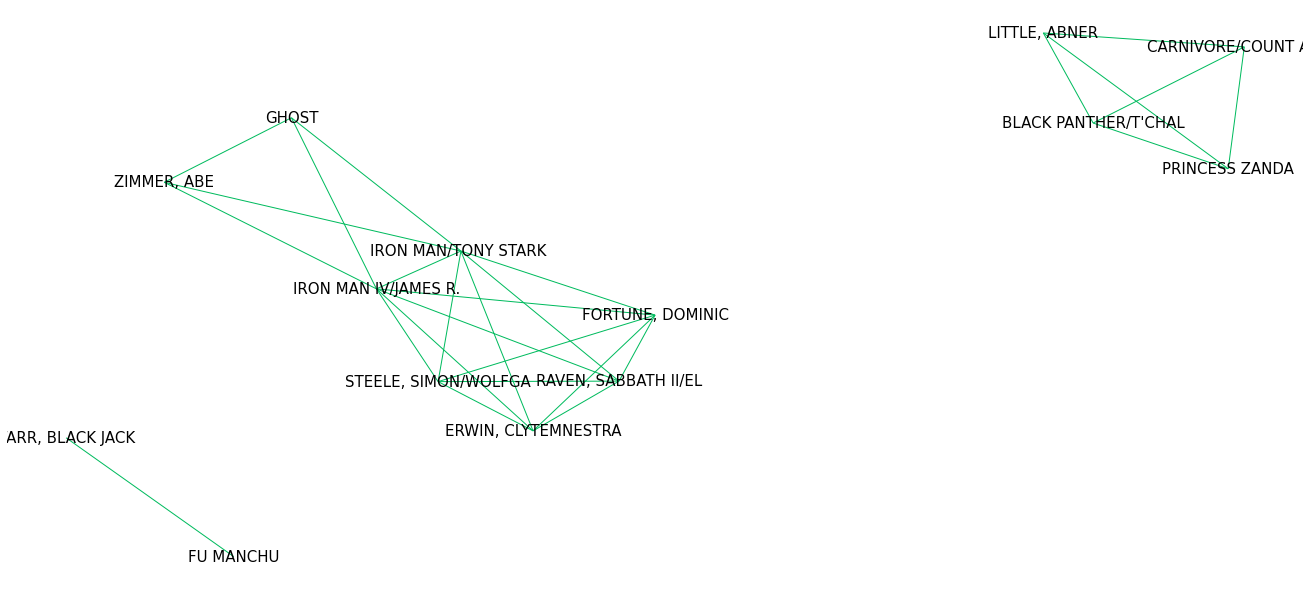

In [6]:
#Graph of first 50 rows
plt.figure(figsize = (18, 8))
pos = nx.spring_layout(g_sample, k=3/math.sqrt(g_sample.order()))
nx.draw(g_sample, pos, with_labels=True, node_size=300, node_color='none', font_size=15, edge_color = '#00bb5e')

In [7]:
plt.savefig("graph_sample.png")

<Figure size 432x288 with 0 Axes>

In [8]:
#Which characters have the highest degree?
degrees = [x[1] for x in g.degree()]
name = [x[0] for x in g.degree()]
df = pd.DataFrame(degrees, index = name)
df.columns = ['degree']
df.sort_values(by = 'degree', ascending = False)
top_1 = df.sort_values(by = 'degree', ascending = False).head(1)

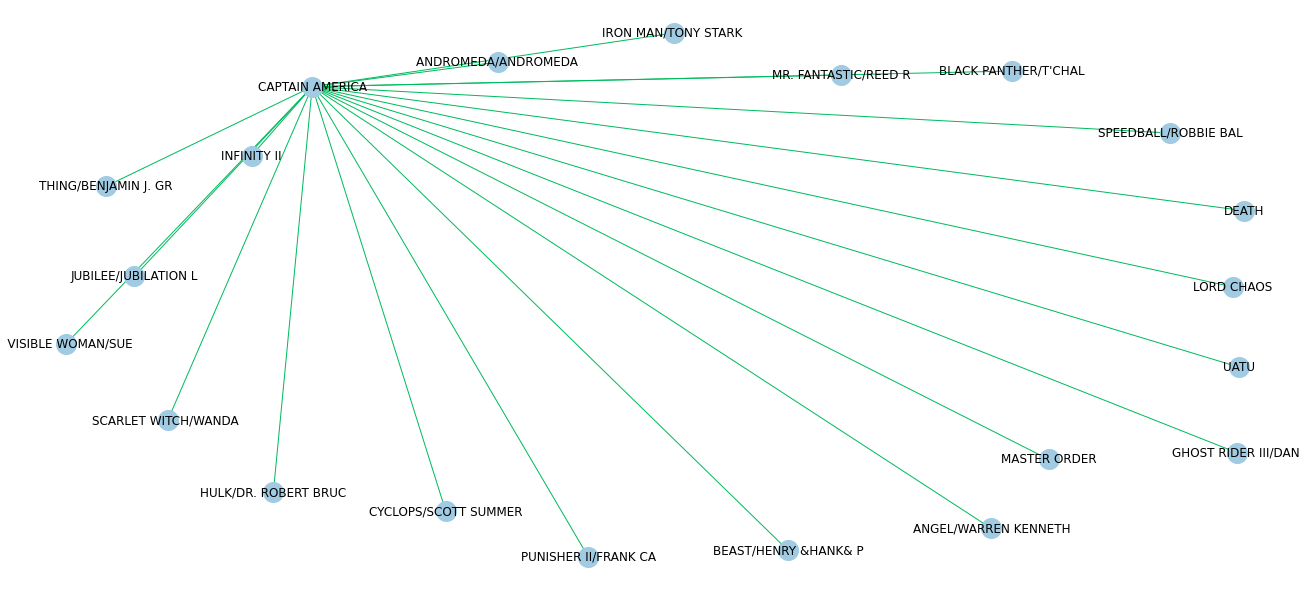

In [9]:
#Captain America is the character with the highest degree and this graph shows his connection with 
#20 out of all other characters he appeared together with
idx = np.where((data['hero1'].isin(list(top_1.index))) | (data['hero2'].isin(list(top_1.index))))
sub_data = data.loc[idx].head(20)

g_top_1 = nx.from_pandas_edgelist(sub_data, source = 'hero1', target = 'hero2',
                                  create_using = nx.Graph())
plt.figure(figsize = (18, 8))
pos = nx.spring_layout(g_top_1, k =20)
nx.draw(g_top_1, pos, with_labels=True, node_size=400, node_color = '#A0CBE2', edge_color = '#00bb5e')
plt.savefig("graph_captainamerica.png")

Text(0.5, 1.0, 'Fraction of nodes having different values of degree')

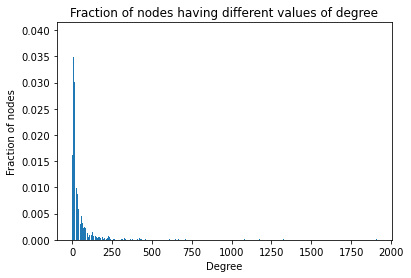

In [10]:
degree_values = sorted(set(degrees))
histogram = [list(degrees).count(i)/float(nx.number_of_nodes(g)) for i in degree_values]
plt.bar(degree_values, histogram)
plt.xlabel('Degree')
plt.ylabel('Fraction of nodes')
plt.title('Fraction of nodes having different values of degree')

As expected, the graph exhibits preferential attachment.

**Centrality measures to identify which characters are more influential:**

Degree centrality (top 10)

In [143]:
#Top 10 degree centrality
sorted(nx.degree_centrality(g).items(), key=lambda item: item[1], reverse = True)[0:10]

[('CAPTAIN AMERICA', 0.2969649805447471),
 ('SPIDER-MAN/PETER PAR', 0.2703501945525292),
 ('IRON MAN/TONY STARK ', 0.23688715953307396),
 ('THING/BENJAMIN J. GR', 0.2203891050583658),
 ('MR. FANTASTIC/REED R', 0.21463035019455254),
 ('WOLVERINE/LOGAN ', 0.21338521400778213),
 ('HUMAN TORCH/JOHNNY S', 0.21182879377431907),
 ('SCARLET WITCH/WANDA ', 0.20622568093385216),
 ('THOR/DR. DONALD BLAK', 0.20062256809338522),
 ('BEAST/HENRY &HANK& P', 0.19719844357976654)]

Closeness centrality (top 10)

In [12]:
#Top 10 closeness centrality
closeCent = nx.closeness_centrality(g)
sorted(closeCent.items(), key=lambda item: item[1], reverse = True)[0:10]

[('CAPTAIN AMERICA', 0.583688144346388),
 ('SPIDER-MAN/PETER PAR', 0.5740902532137266),
 ('IRON MAN/TONY STARK ', 0.5614279813721937),
 ('THING/BENJAMIN J. GR', 0.5577521106953788),
 ('MR. FANTASTIC/REED R', 0.556053126894305),
 ('WOLVERINE/LOGAN ', 0.5548940792092725),
 ('HUMAN TORCH/JOHNNY S', 0.5548458904051726),
 ('SCARLET WITCH/WANDA ', 0.5523038060179429),
 ('THOR/DR. DONALD BLAK', 0.5508751877923405),
 ('BEAST/HENRY &HANK& P', 0.5491233715526914)]

Betweenness centrality (top 10)

In [13]:
#Top 10 betweenness centrality
betCent = nx.betweenness_centrality(g, normalized = True, endpoints = False, k = 10)
sorted(betCent.items(), key=lambda item: item[1], reverse = True)[0:10]

[('CAPTAIN AMERICA', 0.10167697072093673),
 ('SPIDER-MAN/PETER PAR', 0.09121035058263406),
 ('WOLVERINE/LOGAN ', 0.052755263395761844),
 ('MR. FANTASTIC/REED R', 0.04752578662390406),
 ('THING/BENJAMIN J. GR', 0.046899462506122015),
 ('SASQUATCH/WALTER LAN', 0.028600393125907106),
 ('PUCK/EUGENE MILTON J', 0.022736847123368795),
 ('IRON MAN/TONY STARK ', 0.022150923667010717),
 ('HAVOK/ALEX SUMMERS ', 0.021974776448120837),
 ('BEAST/HENRY &HANK& P', 0.02159086272059662)]

Page rank (top 10)

In [14]:
#Top 10 page rank
pagerank = nx.pagerank(g, alpha = 0.8)
sorted(pagerank.items(), key=lambda item: item[1], reverse = True)[0:10]

[('SPIDER-MAN/PETER PAR', 0.005261855050673527),
 ('CAPTAIN AMERICA', 0.0049307160358455894),
 ('IRON MAN/TONY STARK ', 0.003968328834816685),
 ('WOLVERINE/LOGAN ', 0.003767600422721369),
 ('THING/BENJAMIN J. GR', 0.0035067045953507702),
 ('MR. FANTASTIC/REED R', 0.0034038756738321136),
 ('HUMAN TORCH/JOHNNY S', 0.003334344153352487),
 ('THOR/DR. DONALD BLAK', 0.003027959325244021),
 ('BEAST/HENRY &HANK& P', 0.0030202521548447028),
 ('SCARLET WITCH/WANDA ', 0.0030182449189466963)]

Hub and authority score (top 10)

In [15]:
#Top 10 HITS
hub, auth = nx.hits(g)
print('Top 10 characters with the highest hub score')
sorted(hub.items(), key=lambda item: item[1], reverse = True)[0:10]

Top 10 characters with the highest hub score


[('CAPTAIN AMERICA', 0.00300541638482793),
 ('IRON MAN/TONY STARK ', 0.0026390690857082183),
 ('SCARLET WITCH/WANDA ', 0.0025948192286473913),
 ('THING/BENJAMIN J. GR', 0.002593815453799429),
 ('SPIDER-MAN/PETER PAR', 0.002579601123655133),
 ('MR. FANTASTIC/REED R', 0.0025671106476853217),
 ('VISION ', 0.002535950765702988),
 ('HUMAN TORCH/JOHNNY S', 0.0025355170950309585),
 ('WOLVERINE/LOGAN ', 0.002531563018173292),
 ('BEAST/HENRY &HANK& P', 0.0024578178974910573)]

In [16]:
print('Top 10 characters with the highest authority score')
sorted(auth.items(), key=lambda item: item[1], reverse = True)[0:10]

Top 10 characters with the highest authority score


[('CAPTAIN AMERICA', 0.0030054163848430475),
 ('IRON MAN/TONY STARK ', 0.00263906908572068),
 ('SCARLET WITCH/WANDA ', 0.002594819228659479),
 ('THING/BENJAMIN J. GR', 0.0025938154538114144),
 ('SPIDER-MAN/PETER PAR', 0.002579601123665579),
 ('MR. FANTASTIC/REED R', 0.0025671106476968402),
 ('VISION ', 0.0025359507657148014),
 ('HUMAN TORCH/JOHNNY S', 0.0025355170950424255),
 ('WOLVERINE/LOGAN ', 0.0025315630181826226),
 ('BEAST/HENRY &HANK& P', 0.002457817897500418)]

In [21]:
#Number of nodes: 6426, number of edges: 167219
#Number of possible edges: 
comb = math.comb(6426,2)
diff = math.comb(6426,2) - 167219
print('Total number of possible edges is:' + str(comb))
print('Total number - Actual number of edges:', str(diff))

Total number of possible edges is:20643525
Total number - Actual number of edges: 20476306


In [19]:
#Randomly sample 167219 from the 20476306 possible edges to form balanced
#dataset

edges = dict()
for idx, row in data.iterrows():
    edges[(row['hero1'], row['hero2'])] = 1
edges

{('LITTLE, ABNER', 'PRINCESS ZANDA'): 1,
 ('LITTLE, ABNER', "BLACK PANTHER/T'CHAL"): 1,
 ("BLACK PANTHER/T'CHAL", 'PRINCESS ZANDA'): 1,
 ('STEELE, SIMON/WOLFGA', 'FORTUNE, DOMINIC'): 1,
 ('STEELE, SIMON/WOLFGA', 'ERWIN, CLYTEMNESTRA'): 1,
 ('STEELE, SIMON/WOLFGA', 'IRON MAN/TONY STARK '): 1,
 ('STEELE, SIMON/WOLFGA', 'IRON MAN IV/JAMES R.'): 1,
 ('STEELE, SIMON/WOLFGA', 'RAVEN, SABBATH II/EL'): 1,
 ('RAVEN, SABBATH II/EL', 'FORTUNE, DOMINIC'): 1,
 ('RAVEN, SABBATH II/EL', 'ERWIN, CLYTEMNESTRA'): 1,
 ('RAVEN, SABBATH II/EL', 'IRON MAN/TONY STARK '): 1,
 ('RAVEN, SABBATH II/EL', 'IRON MAN IV/JAMES R.'): 1,
 ('IRON MAN IV/JAMES R.', 'FORTUNE, DOMINIC'): 1,
 ('IRON MAN IV/JAMES R.', 'ERWIN, CLYTEMNESTRA'): 1,
 ('IRON MAN IV/JAMES R.', 'IRON MAN/TONY STARK '): 1,
 ('IRON MAN/TONY STARK ', 'FORTUNE, DOMINIC'): 1,
 ('IRON MAN/TONY STARK ', 'ERWIN, CLYTEMNESTRA'): 1,
 ('ERWIN, CLYTEMNESTRA', 'FORTUNE, DOMINIC'): 1,
 ('PRINCESS ZANDA', "BLACK PANTHER/T'CHAL"): 1,
 ('PRINCESS ZANDA', 'LITTLE, AB

In [22]:
import random
missing_edges = set([])
hero2_set = set(data['hero2'])
hero1_set = set(data['hero1'])
hero1_set.update(hero2_set)
heroes_list = list(hero1_set) #this list has a length of 6426

while (len(missing_edges)) < 167219: #to sample 167219
    a=heroes_list[random.randint(0, 6425)]
    b=heroes_list[random.randint(0, 6425)]
    tmp = edges.get((a,b),-1)
    if tmp == -1 and a!=b:
        try:
            if nx.shortest_path_length(g, source =a, target=b) > 2:
                missing_edges.add((a,b))
            else:
                continue
        except:
            missing_edges.add((a,b))
    else:
        continue

In [23]:
connected = data.loc[pd.DataFrame(np.sort(data[['hero1', 'hero2']],1),
            index=data.index).drop_duplicates(keep='first').index]
not_connected = pd.DataFrame(list(missing_edges), columns = ['hero1', 'hero2'])


In [24]:
#connected['tuple'] = list(zip(connected.hero1, connected.hero2))
#connected = connected.loc[:,['hero1', 'hero2']]
#connected.groupby(['hero1', 'hero2']).filter(lambda x: len(x)>1).drop_duplicates()
connected

,hero1,hero2
0,"LITTLE, ABNER",PRINCESS ZANDA
1,"LITTLE, ABNER",BLACK PANTHER/T'CHAL
2,BLACK PANTHER/T'CHAL,PRINCESS ZANDA
6,"STEELE, SIMON/WOLFGA","FORTUNE, DOMINIC"
7,"STEELE, SIMON/WOLFGA","ERWIN, CLYTEMNESTRA"
...,...,...
574170,"GYRICH, HENRY PETER",SELENE
574180,"GYRICH, HENRY PETER",WARLOCK III
574187,"GYRICH, HENRY PETER",KULAN GATH
574204,"COOPER, DR. VALERIE",WARLOCK III


In [25]:
not_connected

,hero1,hero2
0,"MONGRAIN, ALISON",BIG BERTHA/ASHLEY CR
1,"TSO, JASON","YEAGER, CALLIE"
2,"NILES, SEN. CATHERIN",MEGA MAX/
3,TEI,SKULL-JACKET
4,T'CHAKA,SHREEVE
...,...,...
167214,SHADOWCASTER/,"COOPER, WHITNEY III"
167215,CHEMISTRO III,"BURKE, RICKY"
167216,GREEN GOBLIN V/,LORD TEMPLAR/
167217,"ISLEY, LYNN",BOAK


In [26]:
#label and concatenate connected and not_connected
#split cv and test
connected['connection'] = 1
not_connected['connection'] = 0
#sample more? for test set
df = pd.concat([connected, not_connected])
shuffled = df.sample(frac = 1)

In [27]:
#shuffled['tuple'] = list(zip(shuffled.hero1, shuffled.hero2))
#shuffled = shuffled.set_index('tuple')
#shuffled = shuffled.drop(['hero1', 'hero2'], axis = 1)

In [28]:
shuffled

,hero1,hero2,connection
24442,MAGDALENE/MARISSA DA,MIDGARD SERPENT,1
324364,WOLVERINE 2013,PHOENIX III/RACHEL S,1
60783,ELEKTRA | MUTANT X-V,MIDGET,0
51928,PIPELINE/CORMICK GRI,SPOT/,0
61905,DIGGER II/,HELL-EYES,0
...,...,...,...
165534,"LEVESSEUR, LARENT",BOOMSLANG/,0
290155,RED GUARDIAN III/DR.,TORG,1
108974,"DIETZ, SUSAN",PROFESSOR POWER/ANTH,0
25658,"EPSTEIN, MORRIS","KLEIN, SUMMER",0


In [29]:
#preferential attachment
shuffled['pref_att'] = shuffled.apply(lambda row: list(nx.preferential_attachment(g, [(row['hero1'], row['hero2'])]))[0][2], axis = 1)


In [30]:
#jaccard coefficient
shuffled['jacc_coef'] = shuffled.apply(
    lambda row: list(nx.jaccard_coefficient(g, [(row['hero1'], row['hero2'])]))[0][2], axis = 1 )


In [33]:
#resource allocation
shuffled['res_alloc'] = shuffled.apply(
    lambda row: list(nx.resource_allocation_index(g, [(row['hero1'], row['hero2'])]))[0][2], axis = 1)


In [38]:
#adamic adar index
#shuffled['aa_index'] = shuffled.apply(
#    lambda row: list(nx.adamic_adar_index(g, [(row['hero1'], row['hero2'])]))[0][2], axis = 1)

In [40]:
shuffled['Edges'] = list(zip(shuffled.hero1, shuffled.hero2))
shuffled = shuffled.set_index('Edges')
shuffled = shuffled.drop(['hero1', 'hero2'], axis = 1)

In [145]:
shuffled

,connection,pref_att,jacc_coef,res_alloc
Edges,,,,
"(MAGDALENE/MARISSA DA, MIDGARD SERPENT)",1,6545,0.450000,0.177980
"(WOLVERINE 2013, PHOENIX III/RACHEL S)",1,15483,0.084577,0.264671
"(ELEKTRA | MUTANT X-V, MIDGET)",0,4050,0.000000,0.000000
"(PIPELINE/CORMICK GRI, SPOT/)",0,1665,0.000000,0.000000
"(DIGGER II/, HELL-EYES)",0,240,0.000000,0.000000
...,...,...,...,...
"(LEVESSEUR, LARENT, BOOMSLANG/)",0,960,0.000000,0.000000
"(RED GUARDIAN III/DR., TORG)",1,4860,0.163636,0.132759
"(DIETZ, SUSAN, PROFESSOR POWER/ANTH)",0,638,0.000000,0.000000


In [57]:
features = ['pref_att', 'jacc_coef', 'res_alloc']
x = shuffled[features]
y = shuffled['connection']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [58]:
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

Logistic Regression to predict edges

In [105]:
logreg = LogisticRegression()
logreg.fit(x_train_scaled, y_train)
pred = logreg.predict(x_test_scaled)

In [106]:
pred

array([1, 1, 0, ..., 1, 1, 1])

In [107]:
#Test Accuracy
np.mean(pred == y_test)

0.972551130247578

In [114]:
#Train Accuracy
np.mean(logreg.predict(x_train_scaled) == y_train)

0.9731638945991403

In [110]:
testset = x_test
testset['actual'] = y_test
testset['predicted'] = pred
testset

In [113]:
#Logistic regression test set F1 score
f1_score(y_test, pred)

0.9718784462688396

In [151]:
#Neural network MLP classifier
mlp = MLPClassifier(hidden_layer_sizes = [10, 4], alpha = 5, random_state = 0,
                   solver = 'lbfgs', verbose = 0)
mlp.fit(x_train_scaled, y_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(alpha=5, hidden_layer_sizes=[10, 4], random_state=0,
              solver='lbfgs', verbose=0)

In [152]:
#Test set F1 score
pred = mlp.predict(x_test_scaled)
f1_score(y_test, pred)

0.9991799490077383

In [153]:
#Train set F1 score
f1_score(y_train, mlp.predict(x_train_scaled))

0.9992437685782101

It seems that this is not a difficult problem to predict. Both logistic regression and neural network gave good results. These models can be used to predict if a new Marvel character would appear together with existing characters.